**Лабораторная работа №8**

Используя схемы переменных направлений и дробных шагов, решить двумерную начально-краевую задачу для дифференциального уравнения параболического типа. В различные моменты времени вычислить погрешность численного решения путем сравнения результатов с приведенным в задании аналитическим решением $U(x,t)$. Исследовать зависимость погрешности от сеточных параметров $\tau, h_x, h_y$.

$\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} - xy\sin{t}$

$u(0,y,t) = 0,$

$u(1,y,t) - u_x(1,y,t) = 0,$

$u(x,0,t) = 0,$

$u(x,1,t) - u_y(x,1,t) = 0,$

$u(x,y,0) = xy$

Аналитическое решение: $U(x,y,t) = xy\cos{t}$

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def f(x, y, t):
    return -x * y * np.sin(t)

def analytic_solution(x, y, t):
    return x * y * np.cos(t)

def phi1(y, t):
    return 0

def phi2(y, t):
    return 0

def phi3(x, t):
    return 0


def phi4(x, t):
    return 0

def psi(x, y):
    return x * y

In [3]:
def show_result_3d(u1, u2):
    x = np.arange(0, lx + hx, hx)
    y = np.arange(0, ly + hy, hy)
    t = np.arange(0, t_max + tau, tau)
    
    # Моменты времени для отображения
    times = [0.1, 0.5, 1.0]
    time_indices = [np.argmin(np.abs(t - time)) for time in times]  # Индексы времени
    
    fig = plt.figure(figsize=(18, 10))
    fig.suptitle("Графики численных решений и аналитического решения", fontsize=16)
    
    for idx, t_i in enumerate(time_indices):
        # Сетка для аналитического решения
        X, Y = np.meshgrid(x, y)
        analytic = analytic_solution(X, Y, t[t_i])
        
        # Решение u1
        ax = fig.add_subplot(2, len(time_indices), idx + 1, projection='3d')
        ax.plot_surface(X, Y, u1[:, :, t_i].T, cmap='viridis', alpha=0.7)
        ax.plot_wireframe(X, Y, analytic, color='red', alpha=0.9)
        ax.set_title(f"Схема переменных направлений, t = {times[idx]}")
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.set_zlabel("u")
        #ax.legend(["Numerical (Method 1)", "Analytic"], loc="best")
        
        # Решение u2
        ax = fig.add_subplot(2, len(time_indices), idx + 1 + len(time_indices), projection='3d')
        ax.plot_surface(X, Y, u2[:, :, t_i].T, cmap='plasma', alpha=0.7)
        ax.plot_wireframe(X, Y, analytic, color='red', alpha=0.9)
        ax.set_title(f"Схема дробных шагов, t = {times[idx]}")
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.set_zlabel("u")
        #ax.legend(["Numerical (Method 2)", "Analytic"], loc="best")
    
    plt.tight_layout()
    plt.show()

def show_inaccuracy(u1, u2):
    x = np.arange(0, lx + hx, hx)
    y = np.arange(0, ly + hy, hy)
    t = np.arange(0, t_max + tau, tau)
    x_i = 1
    t_i = 2
    plt.title(f"Погрешность по y при x= {x[x_i]}, t = {t[t_i]}")

    for i in range(2):
        inaccuracy = []
        if i == 0:
            u_tfix = u1[:, :, t_i]
        else:
            u_tfix = u2[:, :, t_i]

        for j in range(count_y + 1):
            a = analytic_solution(x, y[j], t[t_i]) - u_tfix[:, j]
            inaccuracy = np.append(inaccuracy, np.linalg.norm(a))
        plt.plot(y, inaccuracy)

    plt.xlabel("y")
    plt.ylabel("error")
    plt.xlim((0, ly))
    plt.grid(True)
    plt.show() 


def calculate_error(u_approx, u_exact):
    return np.sqrt(np.mean((u_approx - u_exact)**2))

def show_inaccuracy1(u1, u2, lx, hx, ly, hy, t_max, tau, t_index=2):
    """Вычисляет и отображает погрешность. Создает массивы t, y и x."""

    t = np.arange(0, t_max + tau, tau)
    y = np.arange(0, ly + hy, hy)
    x = np.arange(0, lx + hx, hx) # Создаем массив x

    if t_index < 0 or t_index >= len(t):
        raise ValueError("Некорректный индекс времени.")

    t_val = t[t_index]
    u_exact_t = np.array([[analytic_solution(xi, yi, t_val) for xi in x] for yi in y])
    u1_t = u1[:, :, t_index]
    u2_t = u2[:, :, t_index]

    error_u1 = calculate_error(u1_t, u_exact_t)
    error_u2 = calculate_error(u2_t, u_exact_t)

    plt.figure(figsize=(10, 6))
    plt.plot(y, np.max(np.abs(u1_t - u_exact_t), axis=0), label='Схема переменных направлений')
    plt.plot(y, np.max(np.abs(u2_t - u_exact_t), axis=0), label='Схема дробных шагов')
    plt.xlabel("y")
    plt.ylabel("Средняя абсолютная ошибка")
    plt.title(f"Погрешность по y при t = {t_val}")
    plt.legend()
    plt.grid(True)

    plt.text(0.95, 0.05, f'Ошибка u1: {error_u1:.4e}\nОшибка u2: {error_u2:.4e}',
             horizontalalignment='right', verticalalignment='bottom', transform=plt.gca().transAxes)

    plt.show()

In [4]:
t_max = 1
t_count = 100
tau = t_max / t_count
count_x = 10
count_y = 10
lx = 1
ly = 1
hx = lx / count_x
hy = ly / count_y

In [5]:
def alternative_directions_scheme():
    u = np.zeros((count_x + 1, count_y + 1, t_count + 1))
    u_1 = np.zeros((count_x + 1, count_y + 1))
    u_2 = np.zeros((count_x + 1, count_y + 1))

    ai = np.zeros(count_x + 1)
    bi = np.zeros(count_x + 1)
    ci = np.zeros(count_x + 1)
    di = np.zeros(count_x + 1)

    for i in range(count_x + 1):
        for j in range(count_y + 1):
            u[i, j, 0] = psi(i * hx, j * hy)

    for k in range(1, t_count + 1):
        u_prev = u[:, :, k - 1]
        t_step = tau * (k - 0.5)

        for j in range(count_y):
            bi[0] = hx
            bi[-1] = hx - 1
            ci[0] = 0
            ai[-1] = 1
            di[0] = phi1(j * hy, t_step) * hx
            di[-1] = phi2(j * hy, t_step) * hx
            for i in range(1, count_x):
                ai[i] = 1
                bi[i] = -2 * (hx**2) / tau - 2
                ci[i] = 1
                di[i] = (
                    -2 * (hx**2) * u_prev[i, j] / tau
                    - (hx**2)
                    * (u_prev[i, j + 1] - 2 * u_prev[i, j] + u_prev[i, j - 1])
                    / (hy**2)
                    - (hx**2) * f(i * hx, j * hy, t_step)
                )

            ta = progonka(ai, bi, ci, di)
            for i in range(count_x + 1):
                u_1[i, j] = ta[i]
                u_1[i, 0] = phi3(i * hx, t_step)
                u_1[i, -1] = (phi4(i * hx, t_step) - u_1[i, -2] / hy) / (1 - 1 / hy)

        for j in range(count_y + 1):
            u_1[0, j] = phi1(j * hy, t_step)
            u_1[-1, j] = (phi2(j * hy, t_step) - u_1[-2, j] / hx) / (1 - 1 / hx)

        for i in range(count_x):
            bi[0] = hy
            bi[-1] = hy - 1
            ci[0] = 0
            ai[-1] = 1
            di[0] = phi3(i * hx, k * tau) * hy
            di[-1] = phi4(i * hx, k * tau) * hy

            for j in range(1, count_y):
                ai[j] = 1
                bi[j] = -2 * (hy**2) / tau - 2
                ci[j] = 1
                di[j] = (
                    -2 * (hy**2) * u_1[i, j] / tau
                    - (hy**2)
                    * (u_1[i + 1, j] - 2 * u_1[i, j] + u_1[i - 1, j])
                    / (hx**2)
                    - (hy**2) * f(i * hx, j * hy, k * tau)
                )

            ta = progonka(ai, bi, ci, di)
            for j in range(count_y + 1):
                u_2[i, j] = ta[j]
                u_2[0, j] = phi1(j * hy, k * tau)
                u_2[-1, j] = (phi2(j * hy, k * tau) - u_2[-2, j] / hx) / (1 - 1 / hx)

        for i in range(count_x + 1):
            u_2[i, 0] = phi3(i * hx, k * tau)
            u_2[i, -1] = (phi4(i * hx, k * tau) - u_2[i, -2] / hy) / (1 - 1 / hy)
            for j in range(count_y + 1):
                u[i, j, k] = u_2[i, j]

    return u


# схема дробных шагов
def fractional_steps_scheme():
    u = np.zeros((count_x + 1, count_y + 1, t_count + 1))
    u_1 = np.zeros((count_x + 1, count_y + 1))
    u_2 = np.zeros((count_x + 1, count_y + 1))

    ai = np.zeros(count_x + 1)
    bi = np.zeros(count_x + 1)
    ci = np.zeros(count_x + 1)
    di = np.zeros(count_x + 1)

    for i in range(count_x + 1):
        for j in range(count_y + 1):
            u[i, j, 0] = psi(i * hx, j * hy)

    for k in range(1, t_count + 1):
        u_prev = u[:, :, k - 1]
        t_step = tau * (k - 1)

        for j in range(count_y):
            bi[0] = hx
            bi[-1] = hx - 1
            ci[0] = 0
            ai[-1] = 1
            di[0] = phi1(j * hy, t_step) * hx
            di[-1] = phi2(j * hy, t_step) * hx
            for i in range(1, count_x):
                ai[i] = 1
                bi[i] = -(hx**2) / tau - 2
                ci[i] = 1
                di[i] = (
                    -(hx**2) * u_prev[i, j] / tau
                    - (hx**2) * f(i * hx, j * hy, t_step) / 2
                )

            ta = progonka(ai, bi, ci, di)
            for i in range(count_x + 1):
                u_1[i, j] = ta[i]
                u_1[i, 0] = phi3(i * hx, t_step)
                u_1[i, -1] = (phi4(i * hx, t_step) - u_1[i, -2] / hy) / (1 - 1 / hy)

        for j in range(count_y + 1):
            u_1[0, j] = phi1(j * hy, t_step)
            u_1[-1, j] = (phi2(j * hy, t_step) - u_1[-2, j] / hx) / (1 - 1 / hx)

        for i in range(count_x):
            bi[0] = hy
            bi[-1] = hy - 1
            ci[0] = 0
            ai[-1] = 1
            di[0] = phi3(i * hx, k * tau) * hy
            di[-1] = phi4(i * hx, k * tau) * hy

            for j in range(1, count_y):
                ai[j] = 1
                bi[j] = -(hy**2) / tau - 2
                ci[j] = 1
                di[j] = (
                    -(hy**2) * u_1[i, j] / tau
                    - (hy**2) * f(i * hx, j * hy, k * tau) / 2
                )
            ta = progonka(ai, bi, ci, di)
            for j in range(count_y + 1):
                u_2[i, j] = ta[j]
                u_2[0, j] = phi1(j * hy, k * tau)
                u_2[-1, j] = (phi2(j * hy, k * tau) - u_2[-2, j] / hx) / (1 - 1 / hx)

        for i in range(count_x + 1):
            u_2[i, 0] = phi3(i * hx, k * tau)
            u_2[i, -1] = (phi4(i * hx, k * tau) - u_2[i, -2] / hy) / (1 - 1 / hy)
            for j in range(count_y + 1):
                u[i, j, k] = u_2[i, j]

    return u


def progonka(a, b, c, d):
    size = len(a)
    P = np.zeros(size)
    Q = np.zeros(size)
    P[0] = -c[0] / b[0]
    Q[0] = d[0] / b[0]

    for i in range(1, size):
        s = b[i] + a[i] * P[i - 1]
        P[i] = -c[i] / s
        Q[i] = (d[i] - a[i] * Q[i - 1]) / s

    result = np.zeros(size)
    result[-1] = Q[-1]

    for i in range(size - 2, -1, -1):
        result[i] = P[i] * result[i + 1] + Q[i]

    return result

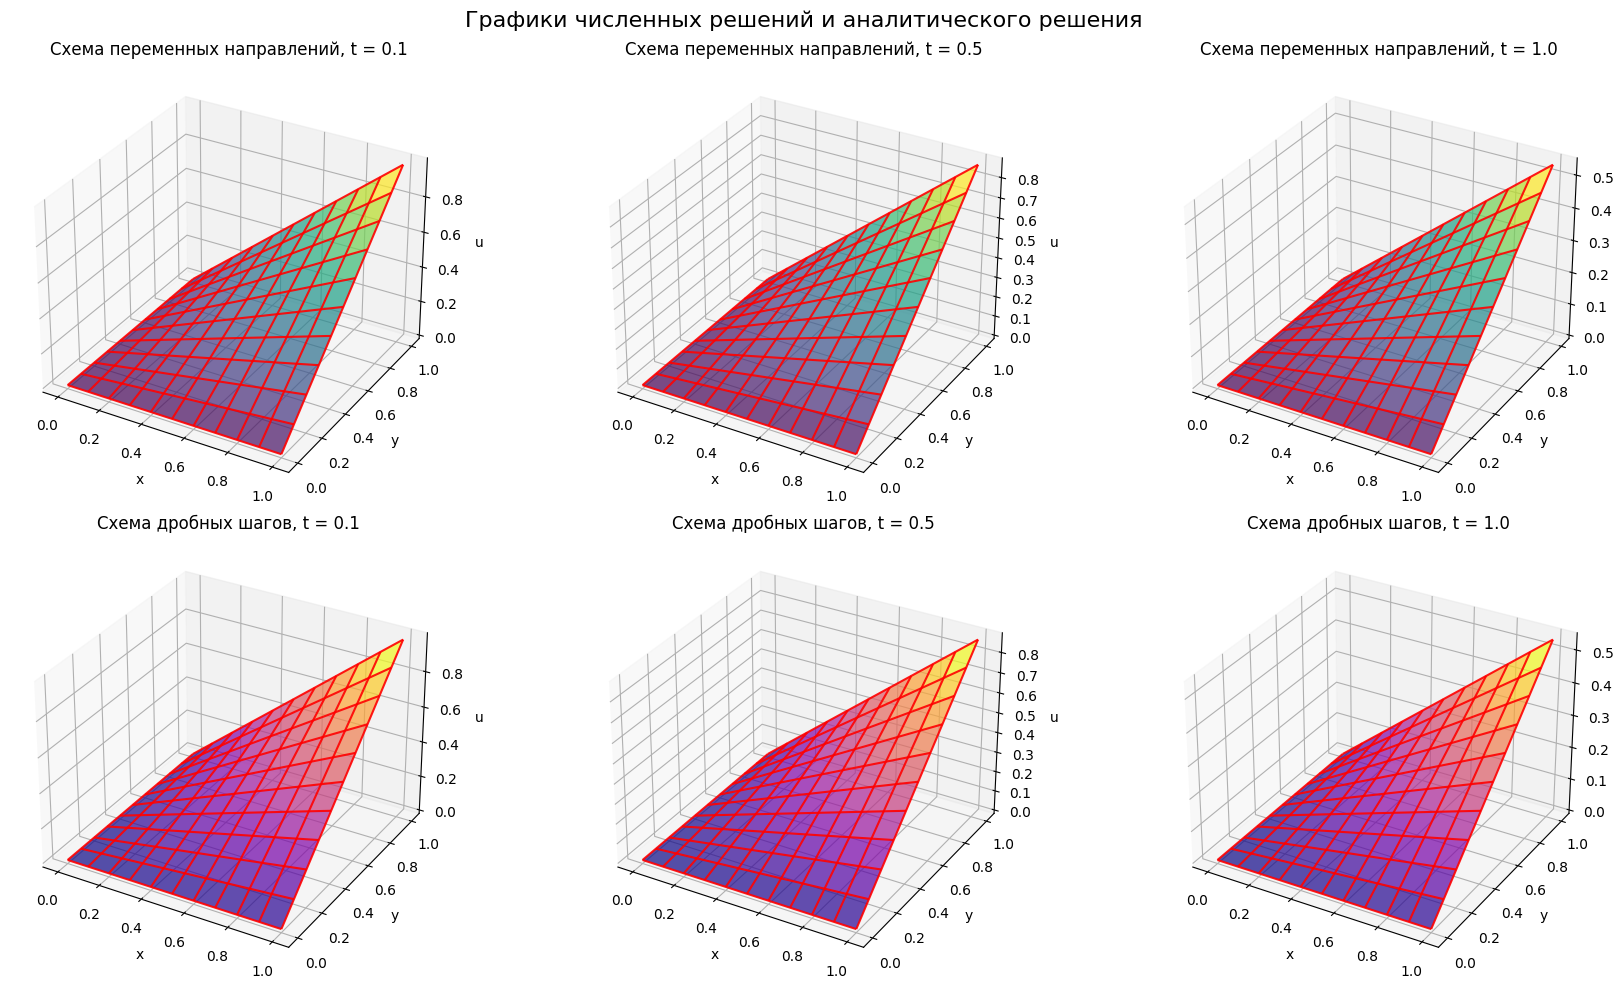

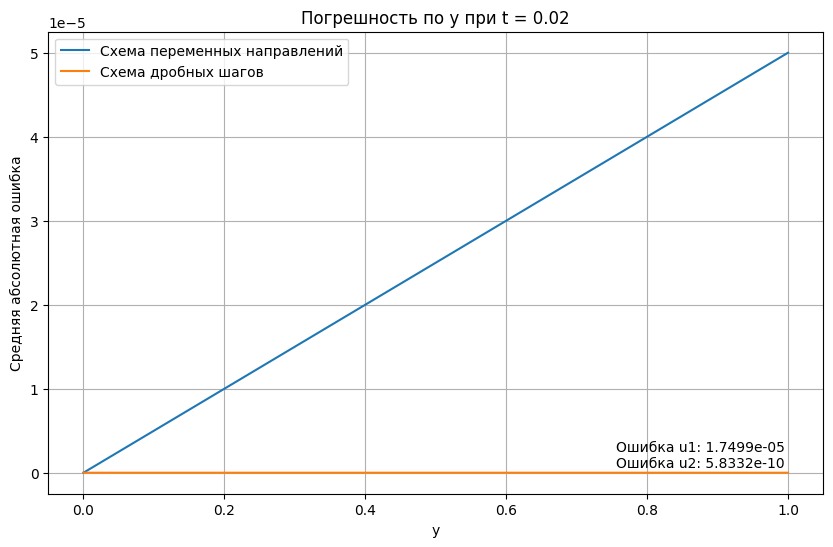

In [6]:
u1 = alternative_directions_scheme()
u2 = fractional_steps_scheme()

show_result_3d(u1, u2)
#show_inaccuracy(u1, u2)
show_inaccuracy1(u1, u2, lx, hx, ly, hy, t_max, tau)